In [52]:
#libraries 
import os
import pandas as pd
import numpy as np

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#accuracy measures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

import pickle


In [53]:
#path = '/Users/mustakimsunny/Desktop/ML/hasin_SGI_project/sgi_project/data/'
#path = '/Users/tasrifahmed'
#file = 'NCDB_1999_to_2017.csv'
dataset = pd.read_csv("/Users/tasrifahmed/PyProjects/untitled/NCDB_1999_to_2017.csv")

/Users/tasrifahmed/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1,2,5,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [54]:
dataset

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
0,1999,1,1,20,2,02,34,UU,1,5,...,06,1990,01,M,41,11,1,UU,1,752
1,1999,1,1,20,2,02,34,UU,1,5,...,01,1987,01,M,19,11,1,UU,1,752
2,1999,1,1,20,2,02,34,UU,1,5,...,01,1987,02,F,20,13,2,02,2,752
3,1999,1,1,08,2,01,01,UU,5,3,...,01,1986,01,M,46,11,1,UU,1,753
4,1999,1,1,08,2,01,01,UU,5,3,...,NN,NNNN,01,M,05,99,2,UU,3,753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6772558,2017,UU,U,UU,2,UU,UU,01,U,U,...,01,UUUU,01,F,20,11,1,NN,1,2455828
6772559,2017,UU,U,UU,2,UU,UU,01,U,U,...,01,UUUU,01,F,47,11,1,NN,1,2455828
6772560,2017,UU,U,UU,2,UU,UU,01,U,U,...,07,UUUU,01,M,24,11,1,NN,1,2455828
6772561,2017,UU,U,23,2,01,03,01,1,1,...,16,UUUU,01,M,45,96,2,09,U,2570233


In [55]:
#check null values at each feature column
dataset.isna().sum()

C_YEAR    0
C_MNTH    0
C_WDAY    0
C_HOUR    0
C_SEV     0
C_VEHS    0
C_CONF    0
C_RCFG    0
C_WTHR    0
C_RSUR    0
C_RALN    0
C_TRAF    0
V_ID      0
V_TYPE    0
V_YEAR    0
P_ID      0
P_SEX     0
P_AGE     0
P_PSN     0
P_ISEV    0
P_SAFE    0
P_USER    0
C_CASE    0
dtype: int64

In [56]:
# Find all distinct value of each column
for col in dataset.columns:
    print(col, set(dataset[col]))
    print('\n')

C_YEAR {1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017}


C_MNTH {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, '12', 'UU', '02', '01', '11'}


C_WDAY {1, 2, 3, 4, 5, 6, 7, '2', '1', 'U', '4', '5', '6', '3', '7'}


C_HOUR {'11', '04', '12', '07', '13', '15', '09', '22', '18', '17', '01', '19', '08', '02', '06', '14', '05', '23', '03', '00', '21', 'UU', '16', '20', '10'}


C_SEV {1, 2}


C_VEHS {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, '07', 15, 14, 17, 18, 19, 20, 21, 16, 22, 24, 25, 26, 27, 28, '10', '09', 31, 33, 35, 36, 37, 38, 39, 43, '18', 44, 46, 47, '01', 56, 57, 58, '71', 72, 77, '03', '23', '54', '41', '13', '22', '38', '25', '40', '77', 'UU', '11', '24', '29', '19', '35', '30', '06', '14', '20', '04', '12', '15', '34', '17', '08', '32', '02', '05', '21', '16', '51', '26', '27'}


C_CONF {'31', '04', '24', '22', '34', '01', '35', '25', 'QQ', '32', '02', '06', '05', '03', '23', '36', '21', 'UU', '33', '41'}


C_RCFG {

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [57]:
#Cleaning form unwanted data
df = dataset[(dataset.C_MNTH != 'UU') & (dataset.C_WDAY != 'U') & (dataset.C_HOUR != 'UU') & (dataset.C_VEHS != 'UU') &
            (dataset.C_CONF != 'QQ') & (dataset.C_CONF != 'UU') & (dataset.C_RCFG != 'UU') & (dataset.C_RCFG != 'QQ') &
            (dataset.C_WTHR != 'U') & (dataset.C_WTHR != 'Q') & (dataset.C_RSUR != 'Q') & (dataset.C_RSUR != 'U') & 
            (dataset.C_RALN != 'U') & (dataset.C_RALN != 'Q') & (dataset.C_TRAF != 'QQ') & (dataset.C_TRAF != 'UU') &
            (dataset.V_ID != 'UU') & (dataset.V_TYPE != 'UU') & (dataset.V_TYPE != 'NN') & (dataset.V_TYPE != 'QQ') & 
            (dataset.V_YEAR != 'NNNN') & (dataset.V_YEAR != 'UUUU') & (dataset.P_ID != 'NN') & (dataset.P_ID != 'UU') &
            (dataset.P_SEX != 'U') & (dataset.P_SEX != 'N') & (dataset.P_AGE != 'UU') & (dataset.P_AGE != 'NN') & 
            (dataset.P_PSN != 'QQ') & (dataset.P_PSN != 'UU') & (dataset.P_PSN != 'NN') & (dataset.P_ISEV != 'N') & 
             (dataset.P_ISEV != 'U') & (dataset.P_SAFE != 'QQ') & (dataset.P_SAFE != 'NN') & (dataset.P_SAFE != 'UU') & 
            (dataset.P_USER != 'U')]

In [58]:
# Make all coumns int

def make_int(df, *arg):
    for col in arg:
        df[col] = df[col].astype(int)
    return df

df = make_int(df, 'C_YEAR','C_MNTH','C_WDAY','C_HOUR','C_SEV','C_VEHS','C_CONF','C_RCFG','C_WTHR','C_RSUR',
              'C_RALN','C_TRAF','V_ID','V_TYPE','V_YEAR','P_ID','P_AGE','P_PSN','P_ISEV','P_SAFE','P_USER','C_CASE')

<ipython-input-58-050eb65e980d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(int)


In [42]:
#df= df1.sample(n=100,replace=True)

In [43]:
#df.to_csv ('export_dataframe.csv')

In [59]:
df

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
52,1999,1,1,9,2,2,34,2,1,1,...,1,1992,1,F,33,11,2,2,1,2890
54,1999,1,1,9,2,2,34,2,1,1,...,1,1992,1,F,70,11,1,2,1,2890
125,1999,1,1,20,2,1,3,3,1,1,...,1,1988,1,F,38,11,2,2,1,4332
141,1999,1,1,5,2,2,1,2,3,2,...,6,1995,1,M,34,11,1,2,1,5053
142,1999,1,1,5,2,2,1,2,3,2,...,6,1995,2,M,30,13,1,2,2,5053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6772521,2017,12,7,18,2,2,35,2,3,2,...,1,2007,1,F,24,11,1,2,1,2569331
6772522,2017,12,7,23,2,1,4,1,2,5,...,1,1996,1,F,42,11,2,2,1,2569432
6772529,2017,12,7,19,2,2,33,2,3,2,...,1,2006,1,F,23,11,2,2,1,2569473
6772534,2017,12,7,13,2,2,21,2,2,1,...,1,2007,1,F,19,11,2,2,1,2569963


In [60]:
#set(df['V_YEAR'])

In [61]:
#make all column categorical data
def convert_to_cat(df, *arg):
    for column in arg:
        df[column] = df[column].astype('category')
        df[column] = df[column].cat.codes
        
    return df

df = convert_to_cat(df, 'C_YEAR','C_MNTH','C_WDAY','C_HOUR','C_SEV','C_VEHS','C_CONF','C_RCFG','C_WTHR','C_RSUR',
              'C_RALN','C_TRAF','V_ID','V_TYPE','V_YEAR','P_ID','P_AGE','P_PSN','P_ISEV','P_SAFE','P_USER','C_CASE', 'P_SEX')

<ipython-input-61-8e146d2ae008>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype('category')
<ipython-input-61-8e146d2ae008>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].cat.codes


In [ ]:

labels =df['C_YEAR']
men_means =df['C_CONF']
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, men_means, width, label='Men')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()


In [62]:
#set(df['V_YEAR'])

In [12]:
#seperate target col from other features to see feature importance
X = df.drop(['C_RCFG', 'C_CASE'], axis=1)  #independent columns
y = df['C_RCFG']    #target column i.e price range

[0.05287856 0.05872344 0.04539447 0.0633772  0.00174388 0.01994058
 0.12077896 0.01566163 0.01669691 0.01730479 0.37155117 0.01526436
 0.01007032 0.07151426 0.0097879  0.00620672 0.07620697 0.01053503
 0.00626846 0.00603076 0.00406365]


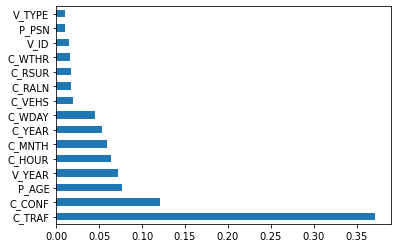

<Figure size 432x288 with 0 Axes>

In [13]:
#feature importance


model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

plt.savefig("out.png")

In [14]:
#univariate selection

import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features

     Specs         Score
10  C_TRAF  1.312417e+07
6   C_CONF  2.095772e+06
9   C_RALN  3.034329e+05
8   C_RSUR  1.476200e+05
16   P_AGE  7.868552e+04
7   C_WTHR  7.836030e+04
0   C_YEAR  4.335337e+04
12  V_TYPE  2.944987e+04
18  P_ISEV  1.799216e+04
3   C_HOUR  1.754756e+04
5   C_VEHS  1.273484e+04
11    V_ID  6.787337e+03
13  V_YEAR  5.482935e+03
2   C_WDAY  3.242556e+03
14    P_ID  2.444056e+03
15   P_SEX  1.924622e+03
20  P_USER  1.599623e+03
17   P_PSN  8.623420e+02
19  P_SAFE  3.249773e+02
1   C_MNTH  2.722133e+02


In [48]:
#drop cols that are not important after feature engineering
def drop_cols(df,*arg):
    columns = list(arg)
    df = df.drop(columns, axis=1)
    return df

df = drop_cols(df,'V_ID','P_PSN','C_CASE','P_SAFE','C_RSUR','C_RALN','P_USER','P_SEX','V_TYPE','C_SEV','P_ISEV','P_ID')

In [49]:
df

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_TRAF,V_YEAR,P_AGE
4226530,2009,11,5,16,03,21,02,3,18,2001,19
5235552,2012,12,5,17,2,21,02,1,01,2000,62
2247768,2004,6,6,20,2,36,01,1,18,2001,52
1132723,2001,9,7,14,2,21,02,1,03,1993,75
5914803,2015,2,6,19,2,22,02,1,18,2014,44
...,...,...,...,...,...,...,...,...,...,...,...
208005,1999,7,4,18,03,21,03,1,18,1996,43
163983,1999,6,2,18,01,03,01,2,18,1985,57
6276628,2016,5,3,17,3,33,02,1,01,2013,28
3048639,2006,7,6,13,2,21,01,1,18,2005,03


In [35]:
#looks like the class values are heavily imbalanced
df['C_RCFG'].value_counts()

1    2014779
0    1523700
2     218917
4      35001
3      11838
7       7185
5       4279
8       1299
6        364
9        251
Name: C_RCFG, dtype: int64

In [36]:
#upsample data to balance
def balance_dataset(dataset, column, frequency_val):
    count = dataset[column].value_counts()
    classes = [key for key,val in count.items()]
    df_majority = dataset.loc[dataset[column] == classes[0]]
    
    all_minor_dfs = []
    for val in classes[1:]:
        all_minor_dfs.append(dataset.loc[dataset[column] == val])
    
    # Upsample minority class
    all_minor_dfs_upsampled = []
    for val in all_minor_dfs:
        df_minority_upsampled = resample(val, 
                                     replace=True,     # sample with replacement
                                     n_samples=frequency_val,    # to match majority class
                                     random_state=123) # reproducible results
        all_minor_dfs_upsampled.append(df_minority_upsampled)
        
    #concatenate majority class with matching upsampled classes
    #for df in all_minor_dfs_upsampled:
    df_balanced = pd.concat([df_majority, all_minor_dfs_upsampled[0]])
    for df in all_minor_dfs_upsampled[1:]:
        df_balanced = pd.concat([df_balanced, df])
    
    df_balanced = shuffle(df_balanced)
    return df_balanced

df_balanced = balance_dataset(df, 'C_RCFG',2014779)

In [37]:
df_balanced['C_RCFG'].value_counts()

9    2014779
8    2014779
7    2014779
6    2014779
5    2014779
4    2014779
3    2014779
2    2014779
1    2014779
0    2014779
Name: C_RCFG, dtype: int64

In [38]:
df_balanced

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_TRAF,V_YEAR,P_AGE
4852512,12,9,4,10,1,6,8,0,2,96,58
6288085,17,4,6,14,1,15,8,0,16,104,28
3963501,10,1,0,17,1,6,4,0,16,102,6
4428586,11,6,3,14,0,2,6,0,16,101,78
1102762,2,8,0,23,1,6,1,0,2,94,52
...,...,...,...,...,...,...,...,...,...,...,...
5967754,16,4,2,18,1,6,1,0,0,107,42
4889719,12,10,5,16,0,2,6,0,16,98,15
6222496,17,1,6,14,2,5,6,0,16,100,39
3471675,8,8,0,10,1,6,5,0,16,99,44


In [39]:
#split into train and test
def split_train_test(dataframe, target):
    train_set, test_set = train_test_split(dataframe, test_size=0.2, random_state=42)
    X_train, X_test = train_set.drop(target, axis=1), test_set.drop(target, axis=1)
    y_train, y_test = train_set[target], test_set[target]
    
    return X_train, X_test, y_train, y_test 

X_train, X_test, y_train, y_test = split_train_test(df_balanced, 'C_RCFG')

In [ ]:
def fit_predict(X_train, X_test, y_train, y_test):
    #algorithms = [KNeighborsClassifier(), DecisionTreeClassifier(),RandomForestClassifier(), GaussianNB()]
    model = KNeighborsClassifier() #DecisionTreeClassifier()
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    y_tain_pred = model.predict(X_train)
    
    return y_tain_pred,y_test_pred, model

y_train_pred, y_test_pred, model = fit_predict(X_train, X_test, y_train, y_test)

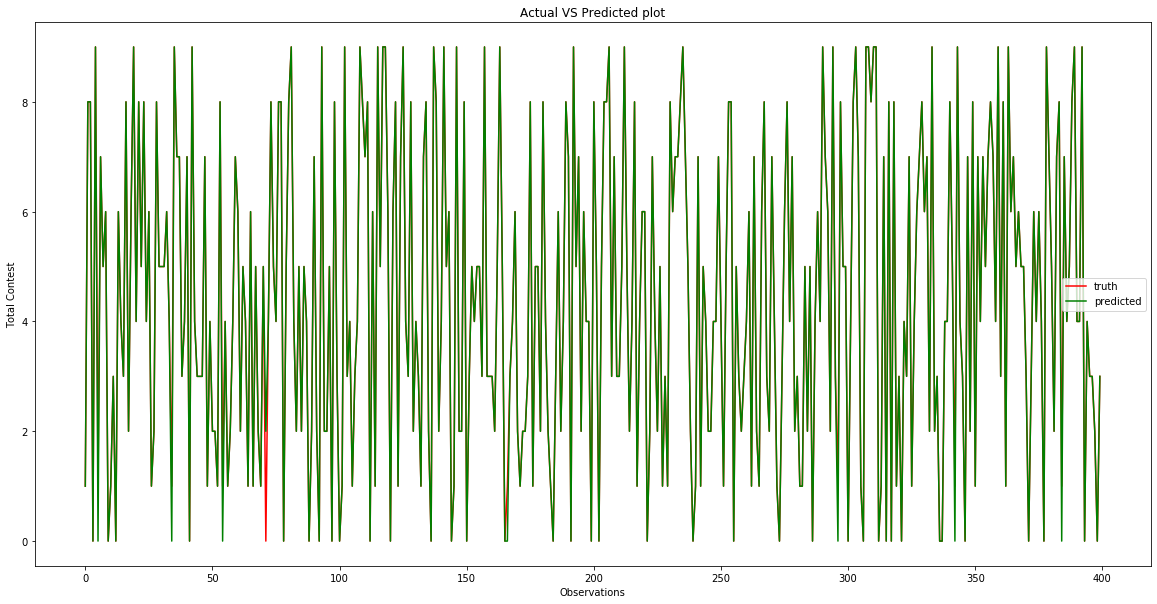

In [61]:
#plot the actual VS predicted values
x = []
for i in range(400):
    x.append(i)
    
plt.figure(figsize=(20,10))
plt.plot(x, y_test[100:500], label = "truth", color='red')
plt.plot(x, y_test_pred[100:500], label = "predicted", color='green')

plt.xlabel('Observations')
plt.ylabel('Total Contest')
plt.title('Actual VS Predicted plot')
plt.legend()

#plt.show()

In [62]:
#model stat
def model_accuracy_stat(y_test, y_test_pred, y_train, y_train_pred):
    print('test accuracy: ', accuracy_score(y_test,y_test_pred))
    print('train accuracy: ', accuracy_score(y_train, y_train_pred))
    #print(classification_report(y_test, y_test_pred))
    print('confusion matrix: \n', confusion_matrix(y_test, y_test_pred))

model_accuracy_stat(y_test, y_test_pred, y_train, y_train_pred)

test accuracy:  0.9838515787587622
train accuracy:  0.9988805844214179
confusion matrix: 
 [[386899  11965   3198     63    311     35      0     28      7      0]
 [ 40283 353043   8585    106    194     18      0     70      8      1]
 [   119     63 402410      5      9      3      0      0      0      0]
 [     0      0      0 402672      0      0      0      0      0      0]
 [     0      0      0      0 402400      0      0      0      0      0]
 [     0      0      0      0      0 403064      0      0      0      0]
 [     0      0      0      0      0      0 403458      0      0      0]
 [     0      0      0      0      0      0      0 403409      0      0]
 [     0      0      0      0      0      0      0      0 403588      0]
 [     0      0      0      0      0      0      0      0      0 403544]]


In [118]:
#K-fold cross validation to check overfitting
def k_fold_cross_validation(num_of_folds, X_train, y_train):
    # check the same model with k-fold cross validation to make sure model is not overfitting
    model = RandomForestClassifier()
    cv_score = cross_val_score(model, X_train, y_train, scoring='r2', cv=num_of_folds)
    
    print(cv_score)

k_fold_cross_validation(10, X_train, y_train)

C:\Users\muhelal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\muhelal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\muhelal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\muhelal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 10

[0.99715213 0.99716062 0.99714679 0.99712423 0.99707414 0.99720198
 0.99716603 0.99719964 0.99714459 0.99713105]


ValueError: x and y must have same first dimension, but have shapes (49,) and (4,)

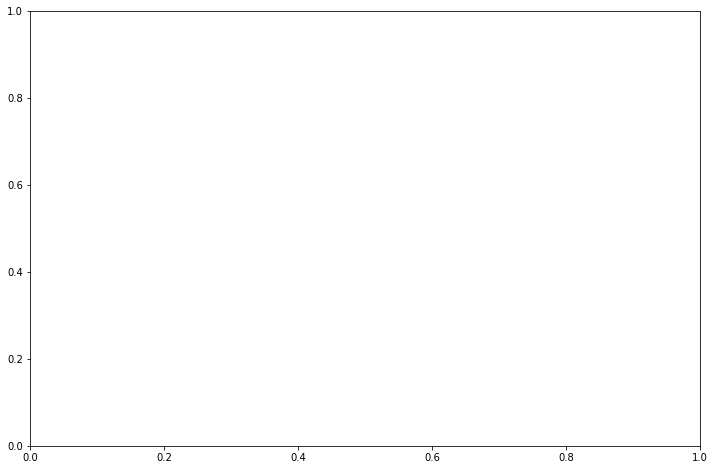

In [63]:
#check to see tree depth VS learning/error rate, also another way to check for overfitting
accuracy_rate = []
training_acc = []

for i in range(1,5):   
    dtree = DecisionTreeClassifier(max_depth=i)
    dtree.fit(X_train, y_train) 
    accuracy_rate.append(dtree.score(X_test, y_test))
    training_acc.append(dtree.score(X_train, y_train))


plt.figure(figsize=(12,8))
#plt.plot(range(1,200),accuracy_rate,color='blue', linestyle='dashed', marker='o',
#         markerfacecolor='red', markersize=10)
plt.plot(np.arange(1,50), accuracy_rate,color='red', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.plot(np.arange(1,50), training_acc,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate vs. Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy Rate')

In [2]:
#next step is to predict some rows from the test set and map it to the unlabelled data

In [52]:
#these inputs will come from user then convert into list>np.array>predict>decode the predicted value
test_input = [18, 10, 2 , 15, 2, 15, 0, 16, 94, 21]
print(model.predict(np.array( [test_input,] )))

[3]


In [ ]:
year = [1990, 1991, 1992]
year = [0,1,2]

In [54]:
X_test

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_VEHS,C_CONF,C_WTHR,C_TRAF,V_YEAR,P_AGE
3269679,8,1,3,13,1,6,0,16,90,22
626400,1,6,3,1,1,16,0,16,94,27
3112820,7,8,4,2,1,16,0,16,98,16
6147174,16,10,6,17,2,6,0,16,107,32
1083739,2,7,3,12,1,15,2,2,90,8
...,...,...,...,...,...,...,...,...,...,...
2879103,7,1,0,10,1,7,0,16,82,46
3274705,8,1,4,8,1,6,0,16,100,25
5483603,14,9,1,2,0,5,0,2,99,30
392134,0,11,3,19,0,0,2,0,87,49


In [67]:
#pickle model 
filename = 'random_forest_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
#these inputs will come from user then convert into list>np.array>predict>decode the predicted value
test_input = []
print(filename .predict(np.array( [test_input,] )))